In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Example: Load or simulate RUL prediction data
# For initial exploration, simulate RUL values (e.g. 0 to 130 cycles)
rul_values = np.linspace(0, 130, 131)

# Define thresholds (example values; tune based on domain knowledge or data)
warning_threshold = 50   # cycles remaining signaling warning alert
critical_threshold = 20  # cycles remaining signaling critical alert

In [2]:
# Function to categorize RUL risk levels
def categorize_rul(rul, warning_thresh, critical_thresh):
    if rul <= critical_thresh:
        return 'Critical'
    elif rul <= warning_thresh:
        return 'Warning'
    else:
        return 'Normal'

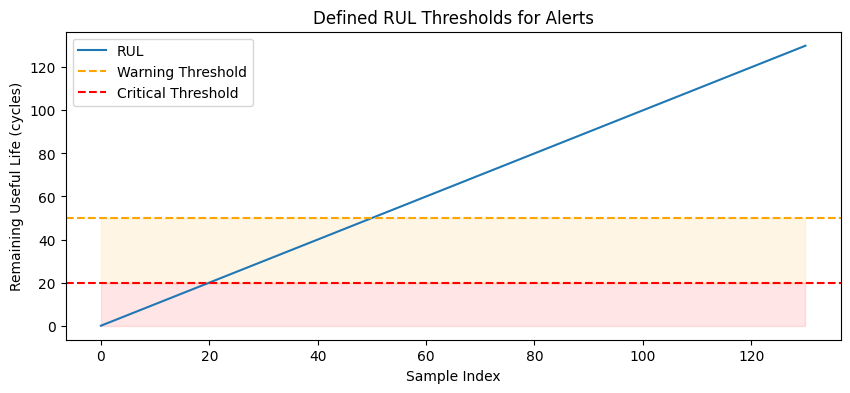

In [3]:
# Apply categorization across RUL values
rul_categories = [categorize_rul(rul, warning_threshold, critical_threshold) for rul in rul_values]

# Quick visualization of threshold zones
plt.figure(figsize=(10, 4))
plt.plot(rul_values, rul_values, label='RUL')
plt.axhline(y=warning_threshold, color='orange', linestyle='--', label='Warning Threshold')
plt.axhline(y=critical_threshold, color='red', linestyle='--', label='Critical Threshold')
plt.fill_between(rul_values, 0, critical_threshold, color='red', alpha=0.1)
plt.fill_between(rul_values, critical_threshold, warning_threshold, color='orange', alpha=0.1)
plt.xlabel('Sample Index')
plt.ylabel('Remaining Useful Life (cycles)')
plt.title('Defined RUL Thresholds for Alerts')
plt.legend()
plt.show()

In [4]:
# Document threshold values and rationale
print(f"Warning Threshold: {warning_threshold} cycles - signals maintenance soon")
print(f"Critical Threshold: {critical_threshold} cycles - signals immediate maintenance required")

Warning Threshold: 50 cycles - signals maintenance soon
Critical Threshold: 20 cycles - signals immediate maintenance required


In [6]:
rul_values = pd.read_csv('sequence_metadata_with_RUL.csv')
rul_values = rul_values['RUL']
rul_values.sample(5)

,RUL
2539,106.0
17045,130.0
9276,53.0
13441,130.0
1689,130.0


In [7]:
rul_categories = [categorize_rul(rul, warning_threshold, critical_threshold) for rul in rul_values]
len(rul_categories)

17631

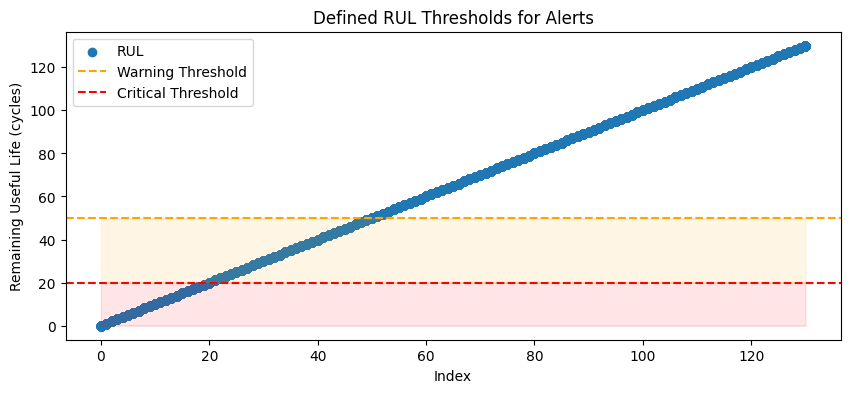

In [8]:
# Quick visualization of threshold zones
plt.figure(figsize=(10, 4))
plt.scatter(rul_values, rul_values,label='RUL')
plt.axhline(y=warning_threshold, color='orange', linestyle='--', label='Warning Threshold')
plt.axhline(y=critical_threshold, color='red', linestyle='--', label='Critical Threshold')
plt.fill_between(rul_values, 0, critical_threshold, color='red', alpha=0.1)
plt.fill_between(rul_values, critical_threshold, warning_threshold, color='orange', alpha=0.1)
plt.xlabel('Index')
plt.ylabel('Remaining Useful Life (cycles)')
plt.title('Defined RUL Thresholds for Alerts')
plt.legend()
plt.show()

**Task: Implement this on 'sequence_metadata_with_RUL' csv file and plot the threshold zones.**

   engine_id  cycle    RUL
0          1   31.0  130.0
1          1   32.0  130.0
2          1   33.0  130.0
3          1   34.0  130.0
4          1   35.0  130.0


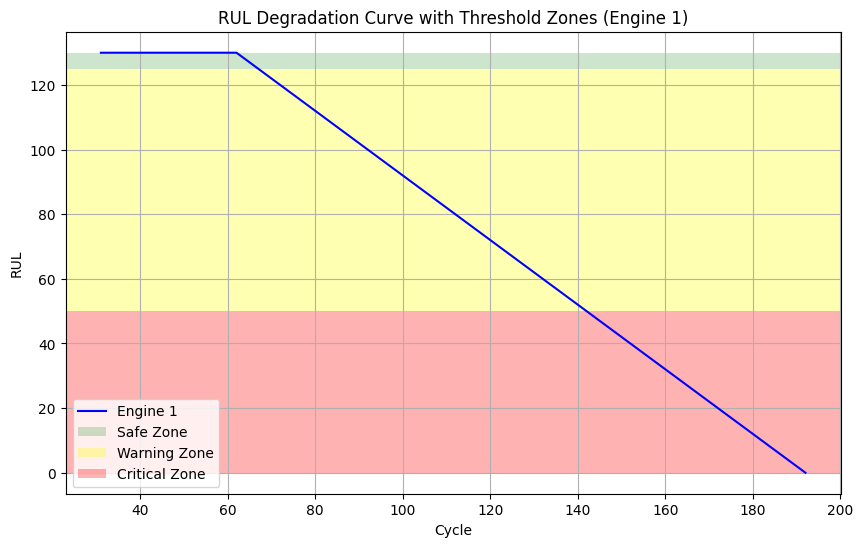

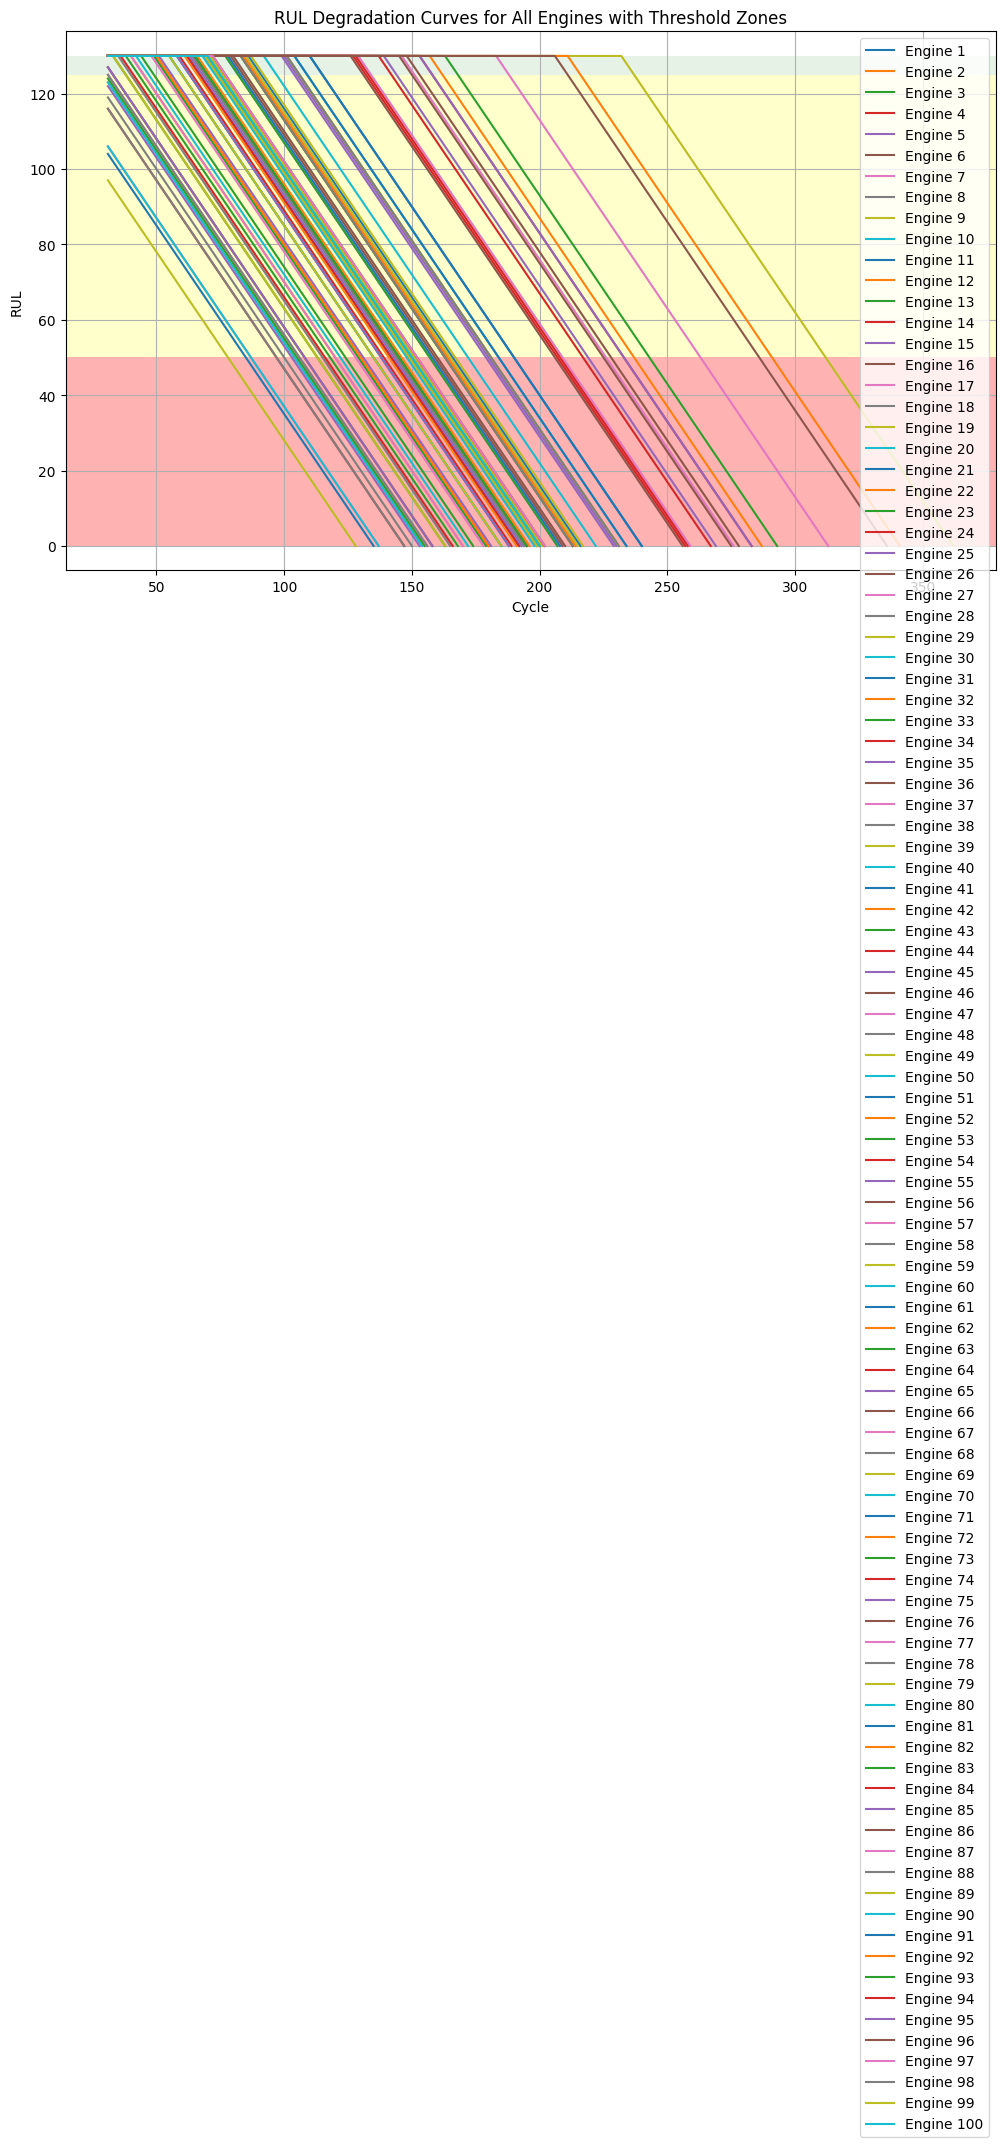

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = "sequence_metadata_with_RUL.csv"
df = pd.read_csv(file_path)

# Show first few rows to confirm structure
print(df.head())

# Thresholds (customize as needed)
safe_threshold = 125
warning_threshold = 50

# Plot RUL curve for a single engine (say engine_id = 1)
engine_id = 1
engine_data = df[df['engine_id'] == engine_id]

plt.figure(figsize=(10,6))
plt.plot(engine_data['cycle'], engine_data['RUL'], label=f'Engine {engine_id}', color="blue")

# Highlight threshold zones
plt.axhspan(safe_threshold, engine_data['RUL'].max(), facecolor='green', alpha=0.2, label="Safe Zone")
plt.axhspan(warning_threshold, safe_threshold, facecolor='yellow', alpha=0.3, label="Warning Zone")
plt.axhspan(0, warning_threshold, facecolor='red', alpha=0.3, label="Critical Zone")

# Labels and legend
plt.title(f"RUL Degradation Curve with Threshold Zones (Engine {engine_id})")
plt.xlabel("Cycle")
plt.ylabel("RUL")
plt.legend()
plt.grid(True)
plt.show()

# If you want to see all engines at once with thresholds:
plt.figure(figsize=(12,7))
for eng in df['engine_id'].unique():
    eng_data = df[df['engine_id'] == eng]
    plt.plot(eng_data['cycle'], eng_data['RUL'], label=f'Engine {eng}')

plt.axhspan(safe_threshold, df['RUL'].max(), facecolor='green', alpha=0.1)
plt.axhspan(warning_threshold, safe_threshold, facecolor='yellow', alpha=0.2)
plt.axhspan(0, warning_threshold, facecolor='red', alpha=0.3)

plt.title("RUL Degradation Curves for All Engines with Threshold Zones")
plt.xlabel("Cycle")
plt.ylabel("RUL")
plt.legend()
plt.grid(True)
plt.show()
